## Import Dataset from SQL

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
import getpass
passw = getpass.getpass("Input something: ")
cnx = create_engine('XXX'%passw)

Input something: ········


In [ ]:
# initial features: project_resource_type, item_unit_price, item_quantity 

In [4]:
pd.read_sql_query('''SELECT * FROM resources LIMIT 5''', cnx)

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal fl...,BB11216668,148.00,1
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Marker...,LA138,34.95,1
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4


In [7]:
merged_data = pd.read_sql_query('''SELECT projects.*, outcomes.is_exciting
FROM projects LEFT JOIN outcomes ON outcomes.projectid = projects.projectid''', cnx)

#### Pickle the data

In [8]:
import pickle

with open('donor_choose.pkl', 'w') as picklefile:
    pickle.dump(merged_data, picklefile)

In [113]:
import pickle

with open("donor_choose.pkl", 'r') as picklefile: 
    merged_data = pickle.load(picklefile)

In [5]:
merged_data.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,is_exciting
0,ffafbe48f4343c2ef45cd912f1a65dbb,7feca507d6836eb776aaa2c80dd5f528,85fb0670a3d4a8ec9719f16c7e441e0d,120120003731,30.469341,-83.381228,Madison,FL,32340,rural,...,highest poverty,Grades PreK-2,30.00,366.01,430.60,20.0,False,False,2013-08-06,False
1,ffa64e5863f02f6e82107201b7498538,e7a30d89c45f32e9f97afff4aa4cd469,c94c6aeb1763861f8db019fc7151821a,261539005198,43.131977,-86.163722,Fruitport,MI,49415,suburban,...,high poverty,Grades 3-5,17.00,198.00,241.46,52.0,False,False,2008-10-11,False
2,ffa49dd7ee05da6f63d61df6c5c4c7ed,5aa172bf137e63517f7157f05b0335ac,4f12c3fa0c1cce823c7ba1df57e90ccb,360015302507,40.641727,-73.965655,Brooklyn,NY,11226,urban,...,highest poverty,Grades PreK-2,9.00,181.55,221.40,28.0,False,False,2009-11-08,False
3,ff7eeec00b853c2ea8138fca67efca64,106e0898e06f75596e7f6e7b39159966,f83867a3e8e56c3a658ee0d5b7a8edb7,280348001236,30.424347,-88.630137,Gautier,MS,39553,None,...,highest poverty,Grades 3-5,30.00,733.88,863.39,40.0,False,False,2012-09-04,False
4,ff6a35480c9b8925c80e99d2d8810a89,c6949e3c657f9d35f82f176a22548dcc,46f95d43009aa59a319f81b07e573e74,482985007833,33.198306,-96.730307,Mckinney,TX,75070,rural,...,low poverty,Grades 3-5,30.00,654.36,769.84,50.0,False,False,2012-04-03,False


In [6]:
merged_data.columns

Index([u'projectid', u'teacher_acctid', u'schoolid', u'school_ncesid',
       u'school_latitude', u'school_longitude', u'school_city',
       u'school_state', u'school_zip', u'school_metro', u'school_district',
       u'school_county', u'school_charter', u'school_magnet',
       u'school_year_round', u'school_nlns', u'school_kipp',
       u'school_charter_ready_promise', u'teacher_prefix',
       u'teacher_teach_for_america', u'teacher_ny_teaching_fellow',
       u'primary_focus_subject', u'primary_focus_area',
       u'secondary_focus_subject', u'secondary_focus_area', u'resource_type',
       u'poverty_level', u'grade_level', u'fulfillment_labor_materials',
       u'total_price_excluding_optional_support',
       u'total_price_including_optional_support', u'students_reached',
       u'eligible_double_your_impact_match', u'eligible_almost_home_match',
       u'date_posted', u'is_exciting'],
      dtype='object')

In [7]:
len(merged_data)

664098

In [8]:
print pd.isnull(merged_data['is_exciting']).sum()

44772


We have 44772 without our outcome variable, this will be our submission set. 

In [117]:
submission_set = merged_data[pd.isnull(merged_data['is_exciting'])]

In [118]:
len(submission_set)

44772

#### Make submission set only with variables we need

In [119]:
conv_grade_dict = {'Grades PreK-2' : 1.,'Grades 3-5' : 2.,'Grades 6-8':3.,'Grades 9-12':4.,'None':np.nan}
submission_set['grade_level'] = submission_set["grade_level"].apply(conv_grade_dict.get)
conv_poverty_dict = {'low poverty' : 1.,'moderate poverty' : 2.,'high poverty':3.,'highest poverty':4.,'None':np.nan}
submission_set['poverty_level'] = submission_set["poverty_level"].apply(conv_poverty_dict.get)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
sub_set = pd.concat([submission_set.loc[:,'school_charter':'school_charter_ready_promise'].astype(int), 
                  pd.get_dummies(submission_set.loc[:, ['school_state', 'school_metro', 'teacher_prefix', 
                 'primary_focus_subject', 'secondary_focus_subject', 
                  'primary_focus_area', 'secondary_focus_area', 'resource_type']]), 
                   submission_set.loc[:, 'teacher_teach_for_america'], 
                    submission_set.loc[:, ['students_reached', 'poverty_level', 
                                        'grade_level', 'total_price_excluding_optional_support']]], axis = 1)

In [11]:
merged_data = merged_data[pd.isnull(merged_data['is_exciting']) == False]

In [12]:
len(merged_data)

619326

## Explore Binary Variables

In [13]:
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from patsy import dmatrices
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
mask = list(merged_data.ix[:,'school_charter': "teacher_ny_teaching_fellow"].columns) + \
['is_exciting'] + ["eligible_double_your_impact_match"] + ['eligible_almost_home_match']

In [16]:
binary_features = merged_data[mask]

In [17]:
binary_features.groupby("is_exciting").mean()

,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,eligible_double_your_impact_match,eligible_almost_home_match
is_exciting,,,,,,,,,,
False,0.082919,0.094649,0.050520,0.015209,0.006359,0.004960,0.055273,0.018036,0.277435,0.060752
True,0.138218,0.091828,0.043966,0.019804,0.013321,0.007246,0.105748,0.015336,0.263825,0.056143


First glance, looks like teach for america, charter, and being a KIPP school makes it more likely project will be "exciting." Suprisingly, eligible does not seem to.

## Run Some Initial Models

#### Convert ordinal variables to numbers

In [18]:
conv_grade_dict = {'Grades PreK-2' : 1.,'Grades 3-5' : 2.,'Grades 6-8':3.,'Grades 9-12':4.,'None':np.nan}
merged_data['grade_level'] = merged_data["grade_level"].apply(conv_grade_dict.get)
conv_poverty_dict = {'low poverty' : 1.,'moderate poverty' : 2.,'high poverty':3.,'highest poverty':4.,'None':np.nan}
merged_data['poverty_level'] = merged_data["poverty_level"].apply(conv_poverty_dict.get)

#### Change is_exciting to integer

In [19]:
merged_data.is_exciting = merged_data.is_exciting.astype(int)

In [20]:
X_and_y = pd.concat([merged_data.loc[:,'school_charter':'school_charter_ready_promise'].astype(int), 
                  pd.get_dummies(merged_data.loc[:, ['school_state', 'school_metro', 'teacher_prefix', 
                 'primary_focus_subject', 'secondary_focus_subject', 
                  'primary_focus_area', 'secondary_focus_area', 'resource_type']]), 
                   merged_data.loc[:, 'teacher_teach_for_america'], 
                    merged_data.loc[:, ['students_reached', 'poverty_level', 
                                        'grade_level', 'total_price_excluding_optional_support']], 
              merged_data["is_exciting"]], axis = 1)

In [21]:
X_and_y = X_and_y.dropna()

In [22]:
X, y = X_and_y.drop("is_exciting", 1) , X_and_y["is_exciting"]

### Do undersampling

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [26]:
from imblearn.under_sampling import RandomUnderSampler
# Generate the new dataset using under-sampling method
verbose = False
# 'Random under-sampling'
US = RandomUnderSampler()
usx_train, usy_train = US.fit_sample(x_train, y_train)

In [84]:
print float(y_train.sum())/len(y_train)
print float(y_test.sum())/len(y_test)

0.059270042185
0.0592784004651


In [29]:
print len(x_train)
print len(usx_train)
print len(usy_train)
print len(y_train)
print y_train.sum()
print usy_train.sum()

464383
55048
55048
464383
27524
27524


#### Drastically reduced size of training set while keeping number of positives the same (making them half) 

### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = {0:.05, 1:.95})
lr2 = LogisticRegression()
lr2.fit(x_train, y_train)
lr.fit(x_train, y_train)
print accuracy_score(y_test, lr.predict(x_test))
print roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print recall_score(y_test, lr.predict(x_test))
print accuracy_score(y_test, lr2.predict(x_test))
print roc_auc_score(y_test, lr2.predict_proba(x_test)[:,1])
print recall_score(y_test, lr2.predict(x_test))

0.375651668336
0.602894308407
0.56076519077
0.770986585894
0.94028230886
0.613971056199
0.5
0.0


In [30]:
lr = LogisticRegression()
lr.fit(usx_train, usy_train)
print accuracy_score(y_test, lr.predict(x_test))
print roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
print recall_score(y_test, lr.predict(x_test))

0.613734293743
0.609795155776
0.537162162162


In [340]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

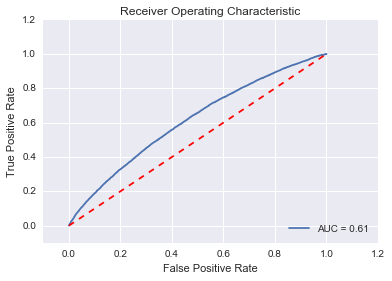

In [341]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.png")

#### Performs similar to when we do weighting. Let's try random forest

### Gridsearch with random forest

In [32]:
RFC = RandomForestClassifier(n_jobs = -1)
RFC.fit(usx_train, usy_train) 
print(accuracy_score(y_test, RFC.predict(x_test)))
print(roc_auc_score(y_test, RFC.predict_proba(x_test)[:,1]))

0.633799541329
0.598705256344


In [37]:
RFC = RandomForestClassifier(n_jobs = -1)

In [40]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
import operator

In [44]:
param_grid = {"max_depth": [1, 5, 10, 20, 40, None],
              "max_features": [1, 3, 10, 30, "sqrt"], 
             "n_estimators": [20, 30, 50]}
grid_search = GridSearchCV(RFC, scoring = "roc_auc", param_grid=param_grid, verbose = 5, cv = StratifiedKFold(usy_train, random_state = 444))
grid_search.fit(usx_train, usy_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] max_features=1, n_estimators=20, max_depth=1 ....................
[CV]  max_features=1, n_estimators=20, max_depth=1, score=0.547175 -   0.6s
[CV] max_features=1, n_estimators=20, max_depth=1 ....................
[CV]  max_features=1, n_estimators=20, max_depth=1, score=0.568101 -   0.4s
[CV] max_features=1, n_estimators=20, max_depth=1 ....................
[CV]  max_features=1, n_estimators=20, max_depth=1, score=0.538213 -   0.5s
[CV] max_features=1, n_estimators=30, max_depth=1 ....................
[CV]  max_features=1, n_estimators=30, max_depth=1, score=0.542225 -   0.5s
[CV] max_features=1, n_estimators=30, max_depth=1 ....................
[CV]  max_features=1, n_estimators=30, max_depth=1, score=0.566006 -   0.6s
[CV] max_features=1, n_estimators=30, max_depth=1 ....................
[CV]  max_features=1, n_estimators=30, max_depth=1, score=0.579742 -   0.5s
[CV] max_features=1, n_estimators=50, max_depth=1 ......

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   10.0s


[CV]  max_features=3, n_estimators=50, max_depth=1, score=0.584543 -   0.7s
[CV] max_features=10, n_estimators=20, max_depth=1 ...................
[CV]  max_features=10, n_estimators=20, max_depth=1, score=0.585022 -   0.5s
[CV] max_features=10, n_estimators=20, max_depth=1 ...................
[CV]  max_features=10, n_estimators=20, max_depth=1, score=0.582730 -   0.5s
[CV] max_features=10, n_estimators=20, max_depth=1 ...................
[CV]  max_features=10, n_estimators=20, max_depth=1, score=0.571113 -   0.5s
[CV] max_features=10, n_estimators=30, max_depth=1 ...................
[CV]  max_features=10, n_estimators=30, max_depth=1, score=0.590923 -   0.5s
[CV] max_features=10, n_estimators=30, max_depth=1 ...................
[CV]  max_features=10, n_estimators=30, max_depth=1, score=0.586216 -   0.5s
[CV] max_features=10, n_estimators=30, max_depth=1 ...................
[CV]  max_features=10, n_estimators=30, max_depth=1, score=0.600537 -   0.6s
[CV] max_features=10, n_estimators=5

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:   51.3s


[CV]  max_features=10, n_estimators=50, max_depth=5, score=0.610716 -   1.5s
[CV] max_features=30, n_estimators=20, max_depth=5 ...................
[CV]  max_features=30, n_estimators=20, max_depth=5, score=0.610856 -   1.4s
[CV] max_features=30, n_estimators=20, max_depth=5 ...................
[CV]  max_features=30, n_estimators=20, max_depth=5, score=0.610342 -   1.3s
[CV] max_features=30, n_estimators=20, max_depth=5 ...................
[CV]  max_features=30, n_estimators=20, max_depth=5, score=0.607010 -   1.4s
[CV] max_features=30, n_estimators=30, max_depth=5 ...................
[CV]  max_features=30, n_estimators=30, max_depth=5, score=0.607252 -   2.1s
[CV] max_features=30, n_estimators=30, max_depth=5 ...................
[CV]  max_features=30, n_estimators=30, max_depth=5, score=0.606154 -   2.0s
[CV] max_features=30, n_estimators=30, max_depth=5 ...................
[CV]  max_features=30, n_estimators=30, max_depth=5, score=0.607676 -   2.2s
[CV] max_features=30, n_estimators=

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  3.5min


[CV]  max_features=10, n_estimators=50, max_depth=20, score=0.641403 -   3.8s
[CV] max_features=30, n_estimators=20, max_depth=20 ..................
[CV]  max_features=30, n_estimators=20, max_depth=20, score=0.626054 -   3.3s
[CV] max_features=30, n_estimators=20, max_depth=20 ..................
[CV]  max_features=30, n_estimators=20, max_depth=20, score=0.634987 -   3.0s
[CV] max_features=30, n_estimators=20, max_depth=20 ..................
[CV]  max_features=30, n_estimators=20, max_depth=20, score=0.633235 -   3.8s
[CV] max_features=30, n_estimators=30, max_depth=20 ..................
[CV]  max_features=30, n_estimators=30, max_depth=20, score=0.630055 -   4.8s
[CV] max_features=30, n_estimators=30, max_depth=20 ..................
[CV]  max_features=30, n_estimators=30, max_depth=20, score=0.639812 -   4.6s
[CV] max_features=30, n_estimators=30, max_depth=20 ..................
[CV]  max_features=30, n_estimators=30, max_depth=20, score=0.636074 -   4.4s
[CV] max_features=30, n_esti

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 10.6min finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=3, shuffle=False, random_state=444),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 3, 10, 30, 'sqrt'], 'n_estimators': [20, 30, 50], 'max_depth': [1, 5, 10, 20, 40, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=5)

In [49]:
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key = operator.itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.645 (std: 0.002)
Parameters: {'max_features': 'sqrt', 'n_estimators': 50, 'max_depth': 20}

Model with rank: 2
Mean validation score: 0.643 (std: 0.002)
Parameters: {'max_features': 'sqrt', 'n_estimators': 50, 'max_depth': 40}

Model with rank: 3
Mean validation score: 0.643 (std: 0.003)
Parameters: {'max_features': 10, 'n_estimators': 50, 'max_depth': 20}



#### Looks like was doing well with sqrt of max_features, larger estimators, and bigger max_depth (but not none). Let's keep tuning

In [56]:
param_grid = {"max_depth": [20, 40, 50, 70],
              "max_features": ["sqrt"], 
             "n_estimators": [50, 80, 100]}
grid_search = GridSearchCV(RFC, scoring = "roc_auc", param_grid=param_grid, verbose = 5, cv = StratifiedKFold(usy_train, random_state = 444))
grid_search.fit(usx_train, usy_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_features=sqrt, n_estimators=50, max_depth=20 ................
[CV]  max_features=sqrt, n_estimators=50, max_depth=20, score=0.642653 -   4.6s
[CV] max_features=sqrt, n_estimators=50, max_depth=20 ................
[CV]  max_features=sqrt, n_estimators=50, max_depth=20, score=0.645904 -   5.0s
[CV] max_features=sqrt, n_estimators=50, max_depth=20 ................
[CV]  max_features=sqrt, n_estimators=50, max_depth=20, score=0.643075 -   5.7s
[CV] max_features=sqrt, n_estimators=80, max_depth=20 ................
[CV]  max_features=sqrt, n_estimators=80, max_depth=20, score=0.644923 -   7.6s
[CV] max_features=sqrt, n_estimators=80, max_depth=20 ................
[CV]  max_features=sqrt, n_estimators=80, max_depth=20, score=0.649064 -   7.7s
[CV] max_features=sqrt, n_estimators=80, max_depth=20 ................
[CV]  max_features=sqrt, n_estimators=80, max_depth=20, score=0.646517 -   8.3s
[CV] max_features=sqrt, n_estimat

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  2.6min


[CV]  max_features=sqrt, n_estimators=100, max_depth=40, score=0.642873 -  14.6s
[CV] max_features=sqrt, n_estimators=50, max_depth=50 ................
[CV]  max_features=sqrt, n_estimators=50, max_depth=50, score=0.638113 -   6.4s
[CV] max_features=sqrt, n_estimators=50, max_depth=50 ................
[CV]  max_features=sqrt, n_estimators=50, max_depth=50, score=0.640959 -   5.6s
[CV] max_features=sqrt, n_estimators=50, max_depth=50 ................
[CV]  max_features=sqrt, n_estimators=50, max_depth=50, score=0.640814 -   5.7s
[CV] max_features=sqrt, n_estimators=80, max_depth=50 ................
[CV]  max_features=sqrt, n_estimators=80, max_depth=50, score=0.644732 -   8.2s
[CV] max_features=sqrt, n_estimators=80, max_depth=50 ................
[CV]  max_features=sqrt, n_estimators=80, max_depth=50, score=0.644802 -   8.2s
[CV] max_features=sqrt, n_estimators=80, max_depth=50 ................
[CV]  max_features=sqrt, n_estimators=80, max_depth=50, score=0.639626 -   8.0s
[CV] max_feat

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.7min finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=3, shuffle=False, random_state=444),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt'], 'n_estimators': [50, 80, 100], 'max_depth': [20, 40, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=5)

In [57]:
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key = operator.itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
report(grid_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.647 (std: 0.002)
Parameters: {'max_features': 'sqrt', 'n_estimators': 80, 'max_depth': 20}

Model with rank: 2
Mean validation score: 0.647 (std: 0.002)
Parameters: {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 20}

Model with rank: 3
Mean validation score: 0.646 (std: 0.003)
Parameters: {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 40}



In [85]:
RFC = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', n_estimators = 80, max_depth =  20)
RFC.fit(usx_train, usy_train) 
print(accuracy_score(y_test, RFC.predict(x_test)))
print(roc_auc_score(y_test, RFC.predict_proba(x_test)[:,1]))

0.601033625117
0.642561352704


NameError: name 'recall' is not defined

In [141]:
RFC1 = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', class_weight = "balanced", n_estimators = 80, max_depth =  20)


In [142]:
RFC1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [276]:
RFC2 = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', n_estimators = 80, max_depth =  20)
RFC2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [284]:
RFC3 = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', n_estimators = 100, max_depth =  40)
RFC3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [291]:
RFC4 = RandomForestClassifier(class_weight = {0: .3, 1: .7}, n_jobs = -1, max_features = 'sqrt', n_estimators = 100, max_depth =  40)
RFC4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.3, 1: 0.7},
            criterion='gini', max_depth=40, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [299]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind='regular')
smox, smoy = smote.fit_sample(x_train, y_train)


In [300]:
RFC5 = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', n_estimators = 80, max_depth =  20)
RFC5.fit(smox, smoy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
print(recall_score(y_test, RFC5.predict(x_test)))
print(accuracy_score(y_test, RFC5.predict(x_test)))
print(roc_auc_score(y_test, RFC5.predict_proba(x_test)[:,1]))

0.0
0.940721599535
0.606541258394


In [317]:
print(recall_scoreb(y_test, RFC4.predict(x_test)))
print(accuracy_score(y_test, RFC4.predict(x_test)))
print(roc_auc_score(y_test, RFC4.predict_proba(x_test)[:,1]))

0.00392327811683
0.940049743209
0.632813556681


In [320]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [327]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RFC.predict_proba(x_test)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [321]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RFC4.predict_proba(x_test)[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

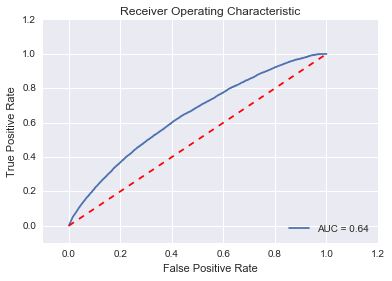

In [337]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.png")

In [243]:
print(recall_score(y_test, RFC1.predict(x_test)))
print(accuracy_score(y_test, RFC1.predict(x_test)))
print(roc_auc_score(y_test, RFC1.predict_proba(x_test)[:,1]))

0.378378378378
0.759682160276
0.63625869902


In [244]:
print(recall_score(y_train, RFC1.predict(x_train)))
print(accuracy_score(y_train, RFC1.predict(x_train)))
print(roc_auc_score(y_train, RFC1.predict_proba(x_train)[:,1]))

0.652921087051
0.789417355932
0.823164514796


In [87]:
from sklearn.metrics import recall_score
print(recall_score(y_test, RFC.predict(x_test)))

0.599280732345


### Create Submission Sets for KDD

In [116]:
sub_set = sub_set.fillna(value = 0)

In [146]:
ss = sub_set

In [161]:
for column in x_train.columns:
    if column not in sub_set.columns: 
        ss[column] = 0  

for column in ss.columns:
    if column not in x_train.columns: 
        ss = ss.drop("teacher_prefix_", axis = 1)

In [136]:
ss.head()

,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,school_state_AK,school_state_AL,school_state_AR,school_state_AZ,school_state_CA,school_state_CO,school_state_CT,school_state_DC,school_state_DE,school_state_FL,school_state_GA,school_state_HI,school_state_IA,school_state_ID,school_state_IL,school_state_IN,school_state_KS,school_state_KY,school_state_LA,school_state_MA,school_state_MD,school_state_ME,school_state_MI,school_state_MN,school_state_MO,school_state_MS,school_state_MT,school_state_NC,school_state_ND,school_state_NE,school_state_NH,school_state_NJ,school_state_NM,school_state_NV,school_state_NY,school_state_OH,school_state_OK,school_state_OR,school_state_PA,school_state_RI,school_state_SC,school_state_SD,school_state_TN,school_state_TX,school_state_UT,school_state_VA,school_state_VT,school_state_WA,school_state_WI,school_state_WV,school_state_WY,school_metro_rural,school_metro_suburban,school_metro_urban,teacher_prefix_,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,secondary_focus_subject_Applied Sciences,secondary_focus_subject_Character Education,secondary_focus_subject_Civics & Government,secondary_focus_subject_College & Career Prep,secondary_focus_subject_Community Service,secondary_focus_subject_ESL,secondary_focus_subject_Early Development,secondary_focus_subject_Economics,secondary_focus_subject_Environmental Science,secondary_focus_subject_Extracurricular,secondary_focus_subject_Foreign Languages,secondary_focus_subject_Gym & Fitness,secondary_focus_subject_Health & Life Science,secondary_focus_subject_Health & Wellness,secondary_focus_subject_History & Geography,secondary_focus_subject_Literacy,secondary_focus_subject_Literature & Writing,secondary_focus_subject_Mathematics,secondary_focus_subject_Music,secondary_focus_subject_Nutrition,secondary_focus_subject_Other,secondary_focus_subject_Parent Involvement,secondary_focus_subject_Performing Arts,secondary_focus_subject_Social Sciences,secondary_focus_subject_Special Needs,secondary_focus_subject_Sports,secondary_focus_subject_Visual Arts,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,secondary_focus_area_Applied Learning,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,teacher_teach_for_america,students_reached,poverty_level,grade_level,total_price_excluding_optional_support,school_state_La,teacher_prefix_Mr. & Mrs.
2410,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [148]:
ss = ss.fillna(value = 0)

In [162]:
len(ss.columns)

145

In [250]:
ss = ss[list(x_train.columns)]

In [277]:
submission_predictions = RFC2.predict_proba(ss)

In [285]:
submission_predictions1 = RFC3.predict_proba(ss)

In [307]:
submission_predictions2 = RFC5.predict_proba(ss)

In [308]:
submission_predictions2

array([[ 0.85750516,  0.14249484],
       [ 0.89388786,  0.10611214],
       [ 0.93374772,  0.06625228],
       ..., 
       [ 0.91890825,  0.08109175],
       [ 0.95840613,  0.04159387],
       [ 0.93513474,  0.06486526]])

In [309]:
sp = pd.DataFrame(submission_predictions[:, 1])
sp1 = pd.DataFrame(submission_predictions1[:, 1])
sp2 = pd.DataFrame(submission_predictions2[:, 1])

In [310]:
sp['projectid'] = ss.index
sp1['projectid'] = ss.index
sp2['projectid'] = ss.index

In [311]:
submission_set.head()
ss.index = submission_set['projectid']

In [312]:
sp1.columns = ['is_exciting', 'projectid']
sp2.columns = ['is_exciting', 'projectid']

In [313]:
sp2.to_csv("kdd_submission", index = False)

In [93]:
for column in sub_set.columns: 
        if column != "teacher_prefix_":
            if pd.isnull(X[column]).sum() != 0:
                print column
                print pd.isnull(X[column]).sum()

### Other Methods

In [92]:
cross_val_score(RandomForestClassifier(), X, y)

array([ 0.91714,  0.91714,  0.91715])

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [104]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train) 
roc_auc_score(y_test, DT.predict(x_test))

0.5

In [115]:
NB = GaussianNB()
NB.fit(x_train, y_train) 
print roc_auc_score(y_test, NB.predict(x_test))
print precision_recall_fscore_support(y_test, NB.predict(x_test)) # reports for each class
print recall_score(y_test, NB.predict(x_test))
# ratio of true positive to everything we said was positive

0.539140024189
(array([ 0.92274289,  0.15761463]), array([ 0.92513765,  0.1531424 ]), array([ 0.92393871,  0.15534633]), array([82458,  7542]))
0.153142402546


.92 precision for non-funded, so 92% of projects we predict aren't funded are, indeed, not funded. 

Only .157 precision for funded, so just 15% of projects we label as funded are actually funded projects. 

.925 recall for non-funded, we got 92% of the non-funded classified as non-funded. Meanwhile, only 15% of funded were correctly labeled as funded. 

In [125]:
print confusion_matrix(y_test, NB.predict(x_test), labels=None)

[[76285  6173]
 [ 6387  1155]]


In [99]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train) 
print accuracy_score(y_test, DT.predict(x_test))

0.9162


In [107]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train) 
print recall_score(y_test, DT.predict(x_test))

0.0
